# Statistics & Econometrics practical task

#### $by$ $Anastasiia$ $Khaburska$



 ___________________________________________________________________




### Problem 3: Hypothesis testing

##### 1. We start with the verification of the law of large numbers. Thus we check if an estimator converges (in probability) to its true value if the sample size increases.

##### (a) Simulate samples of size n = 100, . . . , 100000 from a normal distribution with mean 1 and variance 1, i.e. N (1, 1). For each sample estimate the mean, the variance and store them. Plot the path of sample means and sample variances as function of n. Do the plots support the low of large numbers? Frequently practitioners rely on too small samples for making inferences. How many observations do we need in order to obtain an estimator which is close enough (±1%) to the true value?

In [1]:
set.seed(5)
mean <- c()
var  <- c()
for (n in seq(100, 100000, by=100)){
    sample_n <- rnorm(n, mean=1, sd=1)
    mean <- c(mean, mean(sample_n))
    var <- c(var, var(sample_n))   
}

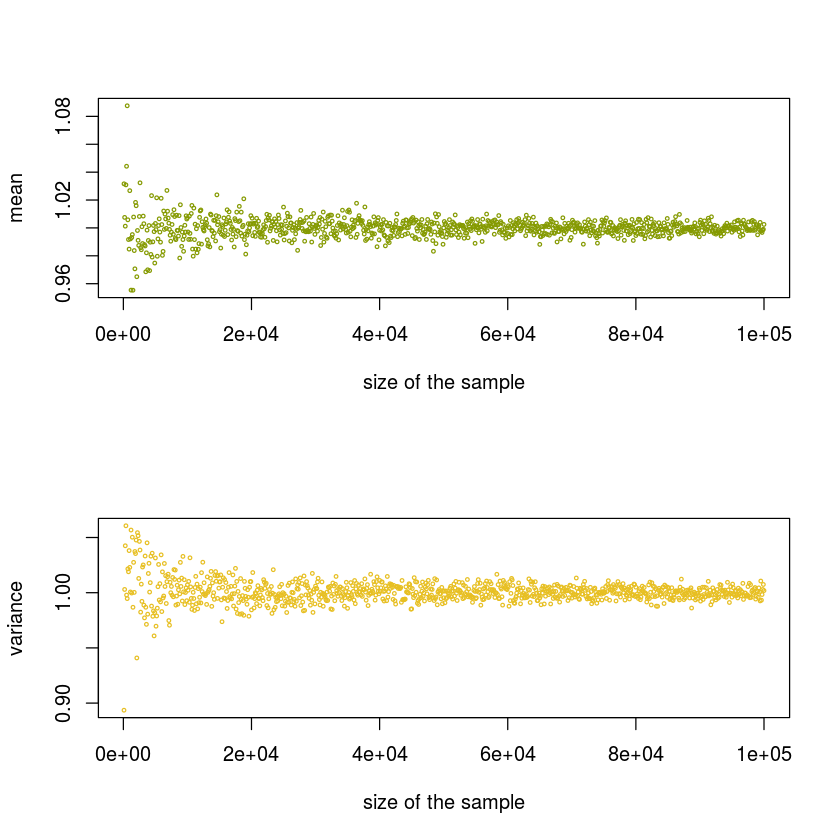

In [2]:
par(mfrow=c(2,1))


plot(x=seq(100, 100000, by=100), y = mean , col = "#859a01" , cex=.4, xlab="size of the sample", ylab="mean")
plot(x=seq(100, 100000, by=100), y = var , col = "#e7bf22" , cex=.4, xlab="size of the sample", ylab="variance" )


#sample_N

In each step the mean and the variance obtained from a larger number of observations becomes closer to the expected values 1 and 1, which means that the plots support the law of large numbers. 

In [3]:
t.test(sample_n)


	One Sample t-test

data:  sample_n
t = 316.71, df = 99999, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 0.9963043 1.0087123
sample estimates:
mean of x 
 1.002508 


In [4]:
#z (1-alpha/2)
z<-qnorm(.025,lower.tail=FALSE)
z

[1] 1.959964

$$[\overline{X} - z_{(1-\frac{\alpha}{2})}\frac{\sigma}{\sqrt{n}} , \overline{X} + z_{(1-\frac{\alpha}{2})}\frac{\sigma}{\sqrt{n}}]$$

$$z_{(1-\frac{\alpha}{2})}\frac{\sigma}{\sqrt{n}} = 0.001\mu$$

$$\sqrt n=\frac{z\sigma}{0.01\mu}$$

In [5]:
n<-1*z*z/(0.0001*1)
n

[1] 38414.59

We need at least $38415$ observations in order to obtain an estimator for the mean which is close enough (±1%) to the
true value.

##### (b) Add to the plot the 95% confidence intervals. These have to be constructed manually. Provide their interpretation.

$$[\hat{X} - t_{n-1, 1-\frac{a}{2}}\frac{S}{\sqrt{N}}, \hat{X} +t_{n-1, 1-\frac{a}{2}}\frac{S}{\sqrt{N}}]$$

$$[\frac{(n-1)S^2}{c_2} , \frac{(n-1)S^2}{c_1}] = [\frac{(n-1)S^2}{χ^2_{n-1, 1-\frac{a}{2}}}, \frac{(n-1)S^2}{χ^2_{n-1, \frac{a}{2}}}]$$

In [6]:
#par(mfrow=c(2,1))
sample_n<-c()
var <-c()
mean_down <- c()
mean_up <- c()
mean<-c()
var_down <- c()
var_up <- c()
for (n in seq(100, 100000, by=100)){
    sample_n <- rnorm(n, mean=1, sd=1)
    mean <- c(mean, mean(sample_n))
    var <- c(var, var(sample_n)) 
    c2<-qchisq(.975, df=n-1)
    c1<-qchisq(.025, df=n-1)
    t<-qt(0.975, n-1)
    #mean_down <- c(mean_down, mean(sample_n)-(z/sqrt(n)))
    #mean_up <- c(mean_up , mean(sample_n)+(z/sqrt(n)))
    mean_down <- c(mean_down, mean(sample_n)-(t*var(sample_n)/sqrt(n)))
    mean_up <- c(mean_up , mean(sample_n)+(t*var(sample_n)/sqrt(n)))
    var_down <- c(var_down, (n-1)*var(sample_n)*var(sample_n)/c2)
    var_up <- c(var_up , (n-1)*var(sample_n)*var(sample_n)/c1)
}

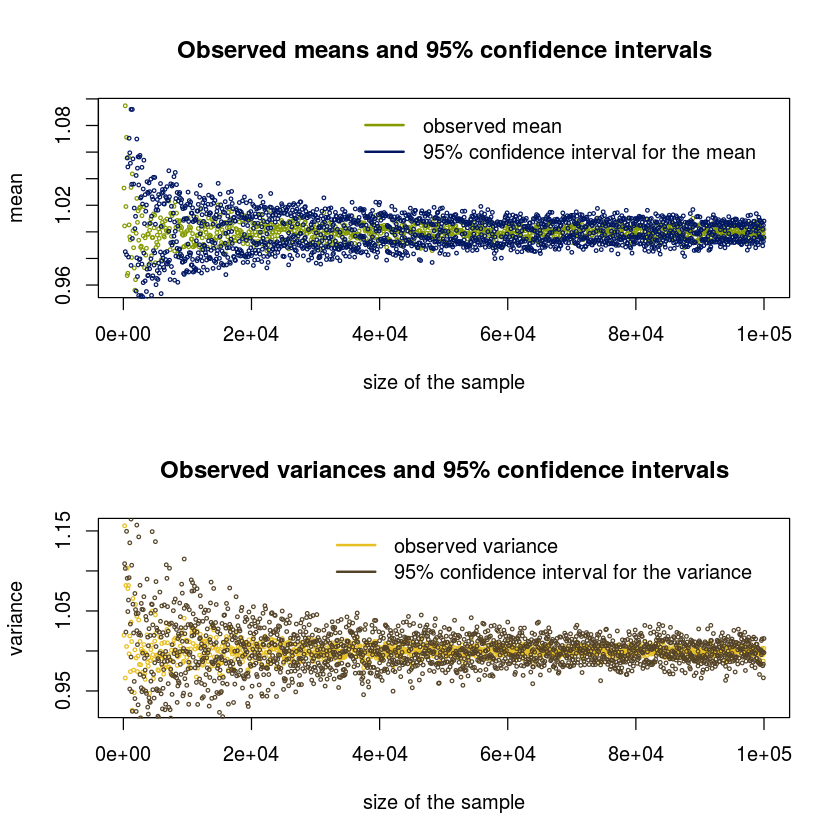

In [7]:
par(mfrow=c(2,1))

plot(x=seq(100, 100000, by=100), y = mean , col = "#859a01" , cex=.4, 
     main="Observed means and 95% confidence intervals",xlab="size of the sample", ylab="mean" )
points(x=seq(100, 100000, by=100), y = mean_down , col = "#011762" , cex=.4 )
points(x=seq(100, 100000, by=100), y = mean_up , col = "#011762" , cex=.4 )
legend(x = "topright", 
 c("observed mean", "95% confidence interval for the mean"),
 col = c("#859a01", "#011762"),
 lwd = c(2, 2, 2),bty='n', xpd=NA)

plot(x=seq(100, 100000, by=100), y = var , col = "#e7bf22", cex=.4,
     main="Observed variances and 95% confidence intervals", xlab="size of the sample", ylab="variance")
points(x=seq(100, 100000, by=100), y = var_down , col = "#544327" , cex=.4 )
points(x=seq(100, 100000, by=100), y = var_up , col = "#544327" , cex=.4 )
par(xpd=FALSE)
legend(x = "topright", 
 c("observed variance", "95% confidence interval for the variance"),
 col = c("#e7bf22", "#544327"),
 lwd = c(2, 2, 2),bty='n', xpd=NA)

As we can see from our charts, that mean and variance support the law of large numbers as the mean and variance with increasing N going to N(1,1) and confidence intervals are decreasing. 
With increasing N our mean and variance will be closer to 1 and with probability 95% mean and variance will be inside smaller and smaller interval.

##### 2. The 2nd objective if this part is to get more feeling for the ML estimation procedures. The estimation for non-standard distributions/models usually follows the maximum-likelihood principle. The t-distribution is a popular alternative if the sample distribution is symmetric but exhibits heavier tails compared to the normal distribution.

##### (a) Let $x_1 , ..., x_n$ be a given sample. We assume that it stems from a t-distribution with an unknown number of degrees of freedom . Write down the corresponding likelihood function.

$$v - \text{degrees of freedom} $$

$$\mathscr{L}_v(x_1, x_2, ... , x_n)=\prod_{i=1}^{n} \frac{\Gamma \left( \frac{v+1}{2}\right)}{\sqrt{v\pi} \Gamma \left( \frac{v}{2}\right)}(1+\frac{x_i^2}{v})^{-\frac{v+1}{2}} $$ 

$$\Gamma(z) = \int_0^\infty x^{z-1} e^{-x}\, dx$$

In [9]:
L <- function(v, sample, n) {
    gamma1<-gamma((v+1)/2)
    down<-sqrt(v*pi)*gamma(v/2)
    likelihood<-((gamma1/down)^n)
     for (i in seq(1, n)){
         likelihood<-likelihood*((1+((sample[i]^2)/v))^(-(v+1)/2))
         #print(sample[i])
         }
    likelihood
 }

##### (b) Simulate a sample of size n = 100 from t 5 . Maximize the likelihood function (numerically) for the given sample and obtain the ML estimator of the number of degrees of freedom.

To maximize the likelihood function I will use buid function optimize which finds minimum of the function on the interval and estimates the best parametr. To achieve my goal I just have to apply this optimizer to -1*likelihood.

In [10]:
set.seed(2)
sample_t <- rt(100, 5)

In [11]:
L_minus <- function(v, sample=sample_t, n=100) {
    gamma1<-gamma((v+1)/2)
    down<-sqrt(v*pi)*gamma(v/2)
    likelihood<-((gamma1/down)^n)
     for (i in seq(1, n)){
         likelihood<-likelihood*((1+((sample[i]^2)/v))^(-(v+1)/2))
         #print(sample[i])
         }
    -likelihood
 }

In [12]:
x<-L(5, sample_t, 100)
x

[1] 5.411015e-71

In [13]:
ML_estimator<-optimize(L_minus, c(1,400))
ML_estimator

$minimum
[1] 5.379579

$objective
[1] -5.514184e-71

So, the maximum likelihood estimator is 5.38 which rounded returns 5, which is exactly what it should be.


________________________________________________________________________________________________________________________


### Problem 4: Linear regression analysis


##### A telephone service provider aims to decrease the churn rate and analyses the data and service usage of 1000 clients. The following variables are used in the study


$tenure$ - month a client 

$age$ - age in years

$marital \ status$ - (1 - married, 0 - single)

$address$ - years at the current address

$income$ - household income in TEuro

$ed$ - education (5 categories: 
        Did not complete high school; 
        High school degree;
        Some college; 
        College degree;
        Post-undergraduate degree)

$retire$ - retired (0 - no, 1 - yes)

$gender$ - (0 - male, 1 - female)

$longmon$ - long distance calls last month

$wiremon$ - internet use last month

$churn$ - 1 if the contract was terminated last month and 0 else

##### The overall objective is to analyze the service usage using the long distance calls last month as the dependent variables and the remaining variables as explanatory.

In [14]:
df <- read.table("telco.txt")
print("number of users", str(nrow(df)))
print("number of variables", str(ncol(df)))

 int 1000
[1] "number of users"
 int 12
[1] "number of variables"


In [15]:
#df<-c(df['age'], df['tenure'])
df2<-data.frame(df$tenure,df$age,df$marital, df$address, df$income, df$ed, df$employ, df$retire, df$gender, df$wiremon, df$churn, df$longmon)
df2[c(1:5,995:1000),1:12]

,df.tenure,df.age,df.marital,df.address,df.income,df.ed,df.employ,df.retire,df.gender,df.wiremon,df.churn,df.longmon
1,13,44,Married,9,64,College degree,5,No,Male,0.0,Yes,3.70
2,11,33,Married,7,136,Post-undergraduate degree,5,No,Male,35.7,Yes,4.40
3,68,52,Married,24,116,Did not complete high school,29,No,Female,0.0,No,18.15
4,33,33,Unmarried,12,33,High school degree,0,No,Female,0.0,Yes,9.45
5,23,30,Married,9,30,Did not complete high school,2,No,Male,0.0,No,6.30
995,15,46,Married,17,63,Post-undergraduate degree,1,No,Male,33.1,Yes,3.70
996,10,39,Unmarried,0,27,Some college,0,No,Female,0.0,No,3.00
997,7,34,Unmarried,2,22,Post-undergraduate degree,5,No,Female,0.0,No,4.65
998,67,59,Unmarried,40,944,Post-undergraduate degree,33,No,Female,65.8,No,26.75
999,70,49,Unmarried,18,87,High school degree,22,No,Female,0.0,No,25.60


##### 1. Have a closer look at the definitions of the variables and analyze which of them might require a separate treatment. Consider for example the variable ed. There are two possibilities how the variable ed can be included into the model (one with dummy variables, the other one without dummies). Think about these two approaches and suggest which approach is more appropriate. Motivate your decision.

1) Here we have 12 variables. 

$tenure$ , $age$, $address(years at adr)$, $income$ , $longmon$, $wiremon$  - quantitative variables . 
        
        For now doesn't need special treatment, exept for maybe sdandartization later

$marital \ status$, $retire$, $churn$, $gender$ - nominal scale. 
        
        These variables can be included into the model use of a dummy variable in this case for two categories (1 and 0). It does not matter what one is 1 and 0. 

        For example if we have dummy variable (X2)
        y = a + b1 X1 + b2 X2
        where X2 = 0 if male, and 1 if female, then clearly the regression for men is
        y = a + b1 X1
        and for women
        y = a + b1 X1 + b2
        so, "b2" here is going to give us some info regarding women as compared to men.
        And the same situation with marital status, retire, churn and gender 
        
$ed$ - education - ordinal scale - can be ordered x<y but on my opinion it 
        
        (5 categories: 
        Did not complete high school; 
        High school degree;
        Some college; 
        College degree;
        Post-undergraduate degree)
        
        Here is three possibilities:
        1) An obviously unsatisfactory way to proceed is to use a variable E that is 0 for the first group, 
        1 for the    second, 2 for the third, 3 for the fourth and 4 for the fifth. That is, 
$$ y = B_1 + ... + B_3E + ε$$

        The difficulty with this approach is that it assumes that the increment model at each threshold is the same; 
        B3 is the difference between long distance calls with a Post-undergraduate degree and a college degree
        and between a college degree and some college. This is unlikely and unduly restricts the regression.
        
        2)A more flexible model would use four binary variables, one for each level of education. 
        Thus, we would write:
$$ Y = β_1 + ... + δ_H H + δ_S S + δ_C C + δ_P P +ε $$
        
        The correspondence between the coefficients and income for a given age is
        Did not complete high school: E [lonmon | P=S=C=H=0] =  β1 + ... + 0 +ε 
        High school degree : E [lonmon | H] = β 1 + ... + δ_H H +ε $$
        Some college : E [income | S] = β 1 + ... + δ_S S +ε 
        College degree : E [income | C] = β 1 + ... + δ_C C +ε 
        Post-undergraduate degree : E [income | P] = β 1 + ... + δ_P P +ε 

        The differences between, say, δ_P and δ_C and between δ_C and δ_S are of interest. Obviously,
        these are simple to compute. 
        
        3)An alternative way to formulate the equation that reveals these differences
        directly is to redefine the dummy variables to be 1 if the individual has the degree, rather than whether 
        the degree is the highest degree obtained. Thus, for someone with a Post-undergraduate degree, 
        all four binary variables are 1, and so on.
        By defining the variables in this fashion, the regression is now
       
        Did not complete high school: E [lonmon | P=S=C=H=0] =  β1 + ... + 0 +ε 
        High school degree : E [lonmon | H] = β 1 + ... + δ_H H +ε $$
        Some college : E [income | S] = β 1 + ...+ δ_H H + δ_S S +ε 
        College degree : E [income | C] = β 1 + ...+ δ_H H + δ_S S + δ_C C +ε 
        Post-undergraduate degree : E [income | P] = β 1 + ... + δ_H H + δ_S S + δ_C C + δ_P P +ε 

        On my opinion that is the most convenient and intuitive way, because, instead of the difference 
        between a post-undergraduate degree and the base case, in this model δ_P is the marginal value of 
        the post-undergraduate degree.
        
        But I will use the second possibility, because I don't know exactly if those, who finished 
        college in that particular country, also finished high school because in my country this can be not as easy. 

In [16]:
readed_df <- read.table("telco.txt")

df <- read.table("telco.txt")

df$marital <- gsub("Married", 1, df$marital)
df$marital <- gsub("Unmarried", 0, df$marital)
df$marital <- as.numeric(df$marital)

df$retire <- gsub("Yes", 1, df$retire)
df$retire <- gsub("No", 0, df$retire)
df$retire <- as.numeric(df$retire)

df$gender <- gsub("Female", 1, df$gender)
df$gender <- gsub("Male", 0, df$gender)
df$gender <- as.numeric(df$gender)

df$churn <- gsub("Yes", 1, df$churn)
df$churn <- gsub("No", 0, df$churn)
df$churn <- as.numeric(df$churn)

df$ed <- gsub("Post-undergraduate degree", 0, df$ed)
df$ed <- gsub("College degree", 0, df$ed)
df$ed <- gsub("Some college", 0, df$ed)
df$ed <- gsub("High school degree", 1, df$ed)
df$ed <- gsub("Did not complete high school", 0, df$ed)
df$H <- as.numeric(df$ed)

df$ed <- readed_df$ed

df$ed <- gsub("Post-undergraduate degree", 0, df$ed)
df$ed <- gsub("College degree", 0, df$ed)
df$ed <- gsub("Some college", 1, df$ed)
df$ed <- gsub("High school degree", 0, df$ed)
df$ed <- gsub("Did not complete high school", 0, df$ed)
df$S <- as.numeric(df$ed)

df$ed <- readed_df$ed

df$ed <- gsub("Post-undergraduate degree", 0, df$ed)
df$ed <- gsub("College degree", 1, df$ed)
df$ed <- gsub("Some college", 0, df$ed)
df$ed <- gsub("High school degree", 0, df$ed)
df$ed <- gsub("Did not complete high school", 0, df$ed)
df$C <- as.numeric(df$ed)

df$ed <- readed_df$ed

df$ed <- gsub("Post-undergraduate degree", 1, df$ed)
df$ed <- gsub("College degree", 0, df$ed)
df$ed <- gsub("Some college", 0, df$ed)
df$ed <- gsub("High school degree", 0, df$ed)
df$ed <- gsub("Did not complete high school", 0, df$ed)
df$P <- as.numeric(df$ed)

df$ed <- readed_df$ed

df$ed <- NULL

So, numerated dataframe with dummies

In [17]:
df

tenure,age,marital,address,income,employ,retire,gender,longmon,wiremon,churn,H,S,C,P
13,44,1,9,64,5,0,0,3.70,0.00,1,0,0,1,0
11,33,1,7,136,5,0,0,4.40,35.70,1,0,0,0,1
68,52,1,24,116,29,0,1,18.15,0.00,0,0,0,0,0
33,33,0,12,33,0,0,1,9.45,0.00,1,1,0,0,0
23,30,1,9,30,2,0,0,6.30,0.00,0,0,0,0,0
41,39,0,17,78,16,0,1,11.80,0.00,0,1,0,0,0
45,22,1,2,19,4,0,1,10.90,0.00,1,1,0,0,0
38,35,0,5,76,10,0,0,6.05,64.90,0,1,0,0,0
45,59,1,7,166,31,0,0,9.75,0.00,0,0,0,1,0
68,41,1,21,72,22,0,0,24.15,0.00,0,0,0,0,0


##### 2. Consider now the dependent variable and the interval (metric) scaled explanatory variables. Plot these data and decide if you wish to transform these x-variables and if there is a need to transform the y variable. You can also use some measure of skewness to decide about y. The variable wiremon shows a very specific pattern. How would you take it into account?

Lets plot histograms for quantitative variables to analize how much they are skewed.

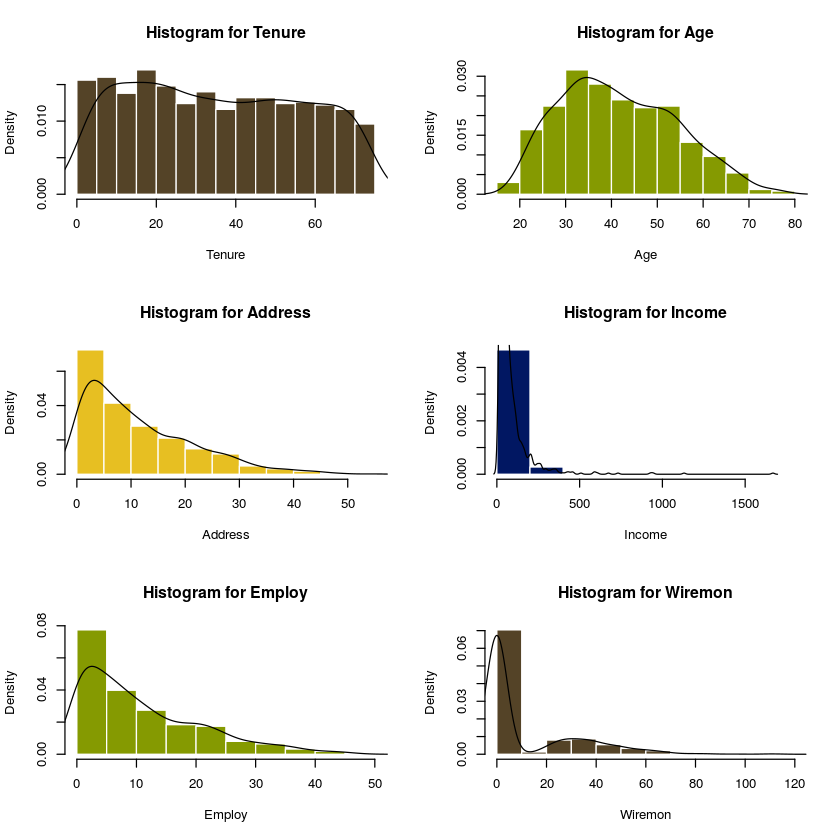

In [18]:
par(mfrow=c(3,2))

hist(df$tenure, 
     main="Histogram for Tenure", 
     xlab="Tenure", 
     border=F, 
     col="#544327", 
     #xlim=c(0,60), 
     #las=3, 
     #breaks=12, 
     prob = TRUE)
lines(density(df$tenure))

hist(df$age, 
     main="Histogram for Age", 
     xlab="Age", 
     border=F, 
     col="#859a01", 
     #xlim=c(30,90), 
     #las=3, 
     #breaks=20, 
     prob = TRUE)
lines(density(df$age))

hist(df$address, 
     main="Histogram for Address", 
     xlab="Address", 
     border=F, 
     col="#e7bf22", 
     #xlim=c(0,15500), 
     #las=3, 
     #breaks=32, 
     prob = TRUE)
lines(density(df$address))

hist(df$income, 
     main="Histogram for Income", 
     xlab="Income", 
     border=F, 
     col="#011762", 
     #xlim=c(2000,162000), 
     #las=3, 
     #breaks=32, 
     prob = TRUE)
lines(density(df$income))

hist(df$employ, 
     main="Histogram for Employ", 
     xlab="Employ", 
     border=F, 
     col="#859a01", 
     #xlim=c(-3000,10000), 
     #las=3, 
     #breaks=26, 
     prob = TRUE)
lines(density(df$employ))

hist(df$wiremon, 
     main="Histogram for Wiremon", 
     xlab="Wiremon", 
     border=F, 
     col="#544327", 
     #xlim=c(0,300000), 
     #las=3, 
     #breaks=30, 
     prob = TRUE)

lines(density(df$wiremon))

#011762
#859a01
#011762
#544327

In [19]:
library(e1071) 
skewness(df$tenure)
skewness(df$age)
skewness(df$address)
skewness(log(df$income))
skewness(df$employ)
skewness(df$wiremon)
skewness(log(df$longmon))

[1] 0.1115246

[1] 0.3555944

[1] 1.102929

[1] 0.6992425

[1] 1.057868

[1] 1.598872

[1] 0.1659451

$Income$ and $Longmon$ are very right skewed samples.

A distribution that is symmetric or nearly so is often easier to handle and interpret than a skewed distribution. More specifically, a normal or Gaussian distribution is often regarded as ideal as it is assumed by many statistical methods.

To reduce right skewness, taking roots or logarithms may be used. Log function essentially deemphasizes very large values.

In our sample there are few very large values. The log transformation essentially reels these values into the center of the distribution making it look more like a Normal distribution.

Also, after such transformation, mean and median metrics become closer.



In [20]:
print("Here are only few outliers for Income, we will adjust them later" )
print(df[df$income>600, ])

[1] "Here are only few outliers for Income, we will adjust them later"
    tenure age marital address income employ retire gender longmon wiremon
209     72  64       0      41    674     37      0      1   49.60   60.15
402     41  52       0      26    928     29      0      0    7.65    0.00
410     39  59       0      20   1668     27      0      1    8.20    0.00
681     65  59       0      27    732     31      0      1   10.15    0.00
850     65  56       1      19    608     34      0      1   14.55   68.30
918     70  68       0      21   1131     45      0      0   14.85   39.50
998     67  59       0      40    944     33      0      1   26.75   65.80
    churn H S C P
209     0 0 0 1 0
402     0 0 1 0 0
410     0 0 0 1 0
681     0 0 1 0 0
850     0 0 1 0 0
918     0 1 0 0 0
998     0 0 0 0 1


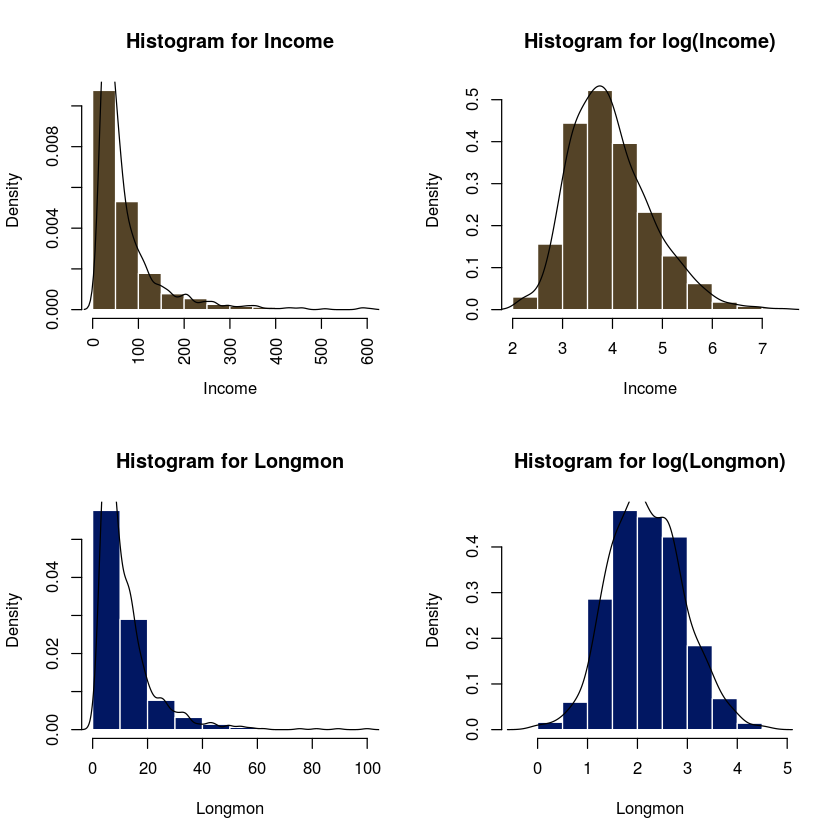

In [21]:
par(mfrow=c(2,2))

hist(df$income, 
     main="Histogram for Income", 
     xlab="Income", 
     border=F, 
     col="#544327", 
     xlim=c(0,600), 
     las=3, 
     breaks=32, 
     prob = TRUE)
lines(density(df$income))

hist(log(df$income), 
     main="Histogram for log(Income)", 
     xlab="Income", 
     border=F, 
     col="#544327", 
     #xlim=c(0,600), 
     #las=3, 
     #breaks=32, 
     prob = TRUE)
lines(density(log(df$income)))

hist(df$longmon, 
     main="Histogram for Longmon", 
     xlab="Longmon", 
     border=F, 
     col="#011762", 
     #xlim=c(0,300000), 
     #las=3, 
     #breaks=30, 
     prob = TRUE)
lines(density(df$longmon))

hist(log(df$longmon), 
     main="Histogram for log(Longmon)", 
     xlab="Longmon", 
     border=F, 
     col="#011762", 
     #xlim=c(0,300000), 
     #las=3, 
     #breaks=30, 
     prob = TRUE)
lines(density(log(df$longmon)))


[1] "Let's look onto the scatter plots of dependence of log(long distance calls) from each particular explanatory variable "


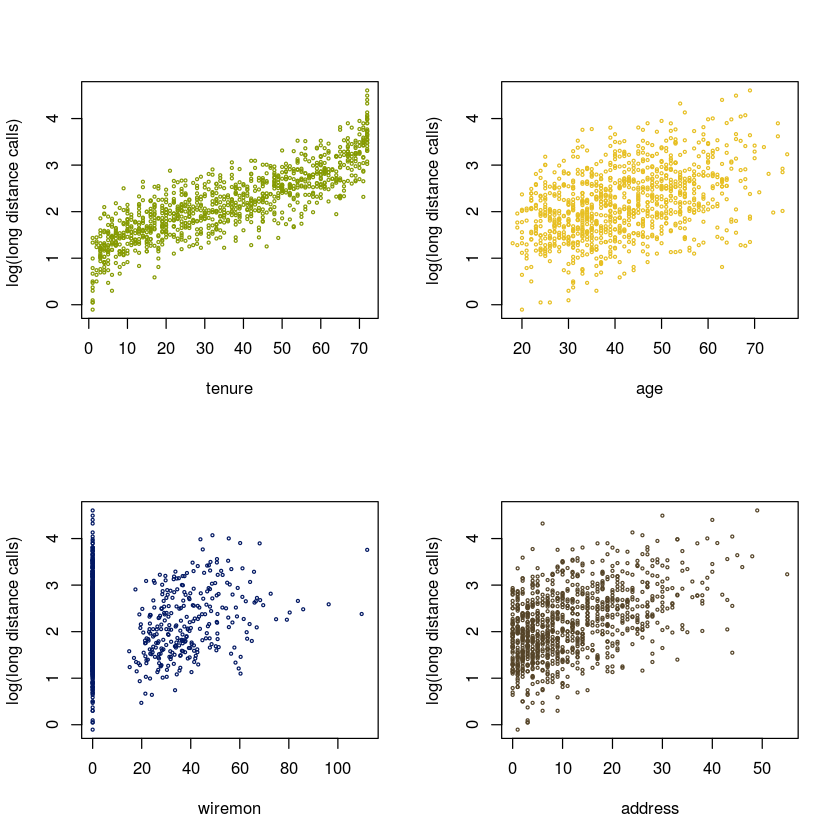

In [22]:
print ("Let's look onto the scatter plots of dependence of log(long distance calls) from each particular explanatory variable ")

par(mfrow=c(2,2))

plot(x=df$tenure, y = log(df$longmon) , col = "#859a01" , cex=.4 ,xlab="tenure", ylab="log(long distance calls) " )
plot(x=df$age, y = log(df$longmon) , col = "#e7bf22", cex=.4, xlab="age", ylab="log(long distance calls)")
plot(x=df$wiremon, y = log(df$longmon) , col = "#011762", cex=.4, xlab="wiremon", ylab="log(long distance calls)")
plot(x=df$address, y = log(df$longmon) , col = "#544327", cex=.4, xlab="address", ylab="log(long distance calls)")

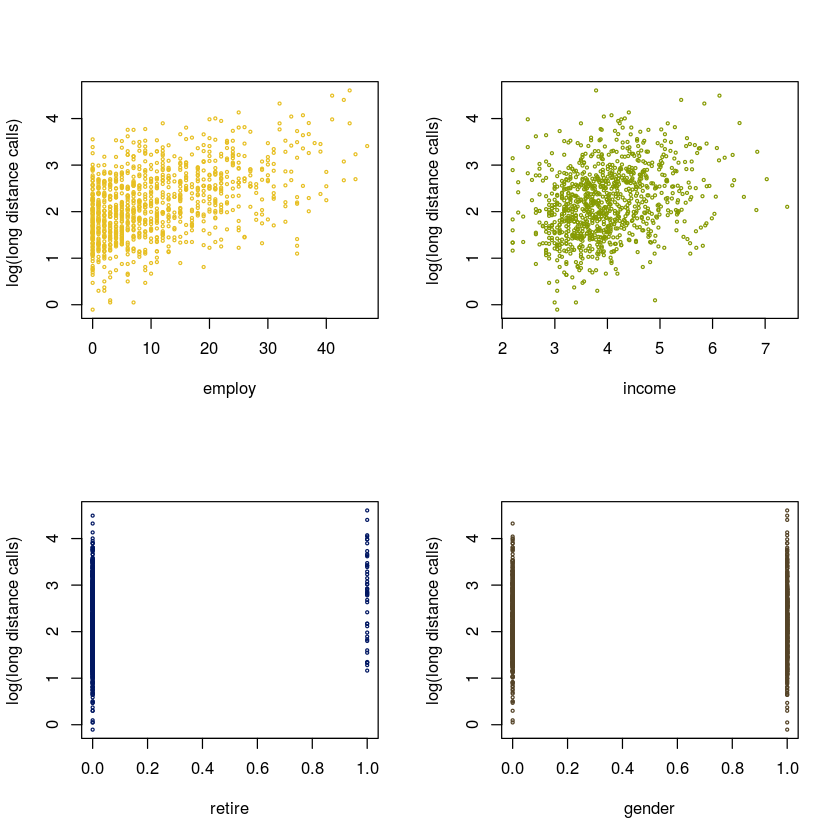

In [23]:
par(mfrow=c(2,2))
plot(x=df$employ, y = log(df$longmon) , col = "#e7bf22", cex=.4, xlab="employ", ylab="log(long distance calls) ")
plot(x=log(df$income), y = log(df$longmon) , col = "#859a01" , cex=.4 ,xlab="income",ylab="log(long distance calls)" )
plot(x=df$retire, y = log(df$longmon) , col = "#011762", cex=.4, xlab="retire", ylab="log(long distance calls)")
plot(x=df$gender, y = log(df$longmon) , col = "#544327" , cex=.4 ,xlab="gender", ylab="log(long distance calls)" )

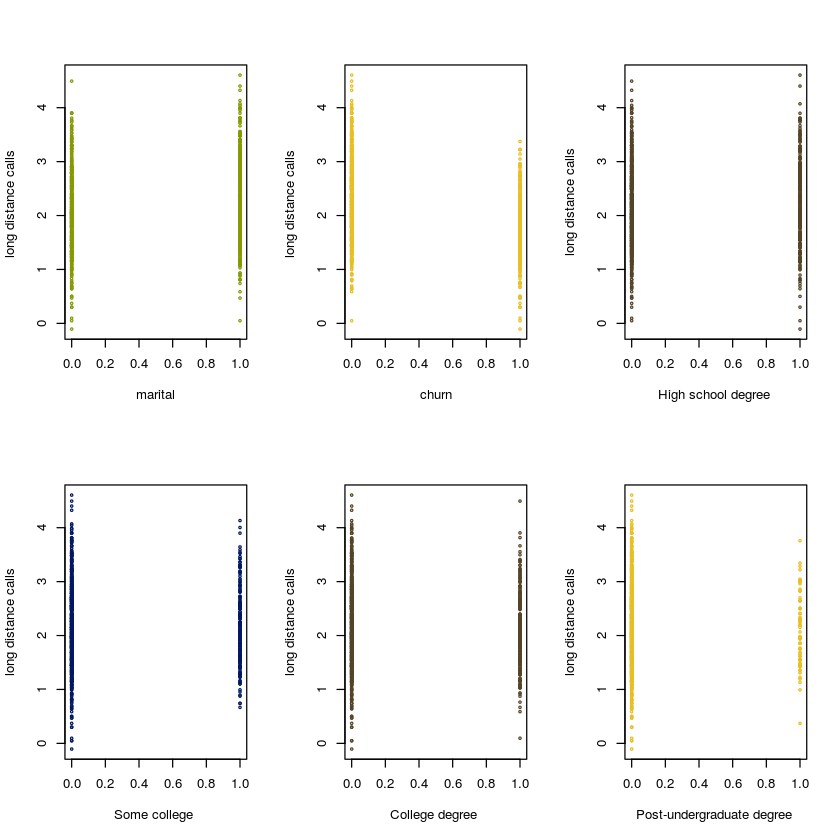

In [24]:
par(mfrow=c(2,3))
plot(x=df$marital, y = log(df$longmon) , col = "#859a01" , cex=.4 ,xlab="marital", ylab="long distance calls " )
plot(x=df$churn, y = log(df$longmon) , col = "#e7bf22", cex=.4, xlab="churn", ylab="long distance calls ")
plot(x=df$H, y = log(df$longmon) , col = "#544327" , cex=.4 ,ylab="long distance calls", xlab="High school degree " )
plot(x=df$S, y = log(df$longmon) , col = "#011762", cex=.4, ylab="long distance calls", xlab="Some college ")
plot(x=df$C, y = log(df$longmon) , col = "#544327" , cex=.4 ,ylab="long distance calls", xlab="College degree " )
plot(x=df$P, y = log(df$longmon) , col = "#e7bf22", cex=.4, ylab="long distance calls", xlab="Post-undergraduate degree ")

Lets consider wiremon variable. It's vector is very sparse so it may be a good idea to split sample on to parts - those who used internet during last night and those who not. Also it may be a good idea to try some logariphmic function on this first part of users.

In [25]:
print(df[df$wiremon>0, ])

    tenure age marital address income employ retire gender longmon wiremon
2       11  33       1       7    136      5      0      0    4.40   35.70
8       38  35       0       5     76     10      0      0    6.05   64.90
14      57  54       1      30    115     23      0      1   15.60   61.05
20      26  29       1       3     77      2      0      0    6.70   38.30
21       6  30       0       7     16      1      0      1    3.75   18.70
23      53  33       0      10    101      4      0      1    5.30   51.40
27      42  40       0       7     37      8      0      1    8.25   37.40
32      71  53       1      27    155     12      0      0   21.00   49.95
35      60  46       1      13    163     24      0      0   33.90   55.25
37      54  60       0      38    211     25      0      0   21.15   54.85
38      44  57       1       1    186     17      0      0    9.80   41.65
44       9  36       1      14     62     10      0      0    5.65   48.50
48      47  41       1   

##### 3. After making up your decision about the above two problems run a simple linear regression. If you wish to argue that education is insignificant and use the model with dummies than you have to check the simultaneous insignificance of all dummies which stem from the factor variable ed. Run a test for general linear hypothesis and conclude about the significance of ed.

Firstly, lets try without logarithm reducing of skeweness:

In [26]:
fit0 <- lm(longmon ~ tenure+age+marital+address+income+employ+retire+gender+wiremon+churn+H+S+C+P, data=df)
summary(fit0)


Call:
lm(formula = longmon ~ tenure + age + marital + address + income + 
    employ + retire + gender + wiremon + churn + H + S + C + 
    P, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-16.171  -3.813  -0.226   2.441  62.993 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.3502740  1.1662062   1.158   0.2472    
tenure       0.2948040  0.0138715  21.252  < 2e-16 ***
age         -0.1237692  0.0293288  -4.220 2.67e-05 ***
marital      1.0518883  0.4520102   2.327   0.0202 *  
address      0.1404165  0.0306790   4.577 5.32e-06 ***
income      -0.0002069  0.0026180  -0.079   0.9370    
employ       0.1643868  0.0355515   4.624 4.27e-06 ***
retire       7.6793132  1.2122953   6.335 3.61e-10 ***
gender      -0.4151276  0.4434662  -0.936   0.3495    
wiremon     -0.0040656  0.0120092  -0.339   0.7350    
churn        0.2107492  0.5452508   0.387   0.6992    
H            1.3752364  0.6514947   2.111   0.0350 *  
S            0.906732

And know with logarithm:

In [27]:
#df2<-df
#df2$longmon<-log(df$longmon)
#df2$income<-log(df$income)
#fit <- lm(longmon ~ tenure+age+marital+address+income+employ+retire+gender+wiremon+churn+H+C+S+P, data=df2)
#summary(fit)
fit <- lm(log(longmon) ~ tenure+age+marital+address+income+employ+retire+gender+wiremon+churn+H+S+C+P, data=df)
summary(fit)


Call:
lm(formula = log(longmon) ~ tenure + age + marital + address + 
    income + employ + retire + gender + wiremon + churn + H + 
    S + C + P, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.25670 -0.24568  0.00158  0.25576  1.23026 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.147e+00  6.601e-02  17.382  < 2e-16 ***
tenure       2.727e-02  7.851e-04  34.736  < 2e-16 ***
age         -2.531e-03  1.660e-03  -1.525  0.12767    
marital      6.961e-02  2.558e-02   2.721  0.00662 ** 
address      3.787e-03  1.736e-03   2.181  0.02940 *  
income      -8.483e-05  1.482e-04  -0.573  0.56711    
employ       3.570e-03  2.012e-03   1.774  0.07636 .  
retire       1.984e-01  6.861e-02   2.891  0.00392 ** 
gender      -3.469e-02  2.510e-02  -1.382  0.16731    
wiremon     -7.715e-05  6.797e-04  -0.114  0.90965    
churn       -3.877e-02  3.086e-02  -1.256  0.20930    
H            9.881e-02  3.687e-02   2.680  0.00749 ** 
S     

Second model is signifficatly better:

Residual sum of squares $\text{RSS} = \sum_{i=1}^n \left({y}_i - \hat{y}_i\right)^2$ is significantly smaller which means that the discrepancy between the data and an estimation model is smaller

Explained sum of squares $\text{ESS} = \sum_{i=1}^n \left(\hat{y}_i - \bar{y}\right)^2$

Total sum of squares $\text{TSS} = \sum_{i=1}^n \left({y}_i - \bar{y}\right)^2$

The coefficient of determination $R^2 = \frac{ESS}{TSS} = 1 -\frac{RSS}{TSS} = 1 - \frac{\sum_{i=1}^n({y}_i - \hat{y}_i)^2}{ \sum_{i=1}^n \left({y}_i - \bar{y}\right)^2} $ is closer to 1, which indicates that there is higher squared correlation between the observed values and the fitted values 

Adjusted $R^2 = \frac{RSS/(N-K-1)}{TSS/(N-1)}$ those two models have the same number of predictors, so adjusted R is not very signifficant in this comparrison


-

Let's test for general linear hypothesis and conclude about the significance of ed variable and its dummies:

$H_0: \beta_H = \beta_P = \beta_S = \beta_C = 0 \ \ \ \ $   $\ \ \ H_1: at \ least \ one \ of \ them \ not \ equls \ 0$

In [28]:
#install.packages("gmodels")
library(gmodels)
R=rbind( c(0,0,0,0,0,0,0,0,0,0,0,1,0,0,0),
         c(0,0,0,0,0,0,0,0,0,0,0,0,1,0,0), 
         c(0,0,0,0,0,0,0,0,0,0,0,0,0,1,0),  
         c(0,0,0,0,0,0,0,0,0,0,0,0,0,0,1))
r=c(0,0,0,0)
glh.test( fit, cm=R, d=r )


	 Test of General Linear Hypothesis 	
Call:
glh.test(reg = fit, cm = R, d = r)
F = 3.2605, df1 =   4, df2 = 985, p-value = 0.01142 


Here p-value is not very small but still smaller then <0.05 , thus I can conclude that there is some linear association between education and long distance calls. But, actually, this dependence is not very statistically significant (for example if to use treshhold 0.01 one accept the hypothesis) so it depends on the resercher preference wether to use it or not.

We don't delete our education as it's complex set of values and we can delete it only if all education values are insignificant. But in our case we can see, that three of them are statistically significant, so we have to leave it in our model. 

##### 4. Provide an economic interpretation for the parameters of address, ed, and retire. Neglect the possible insignificance and keep in mind possible transformations of the variables.

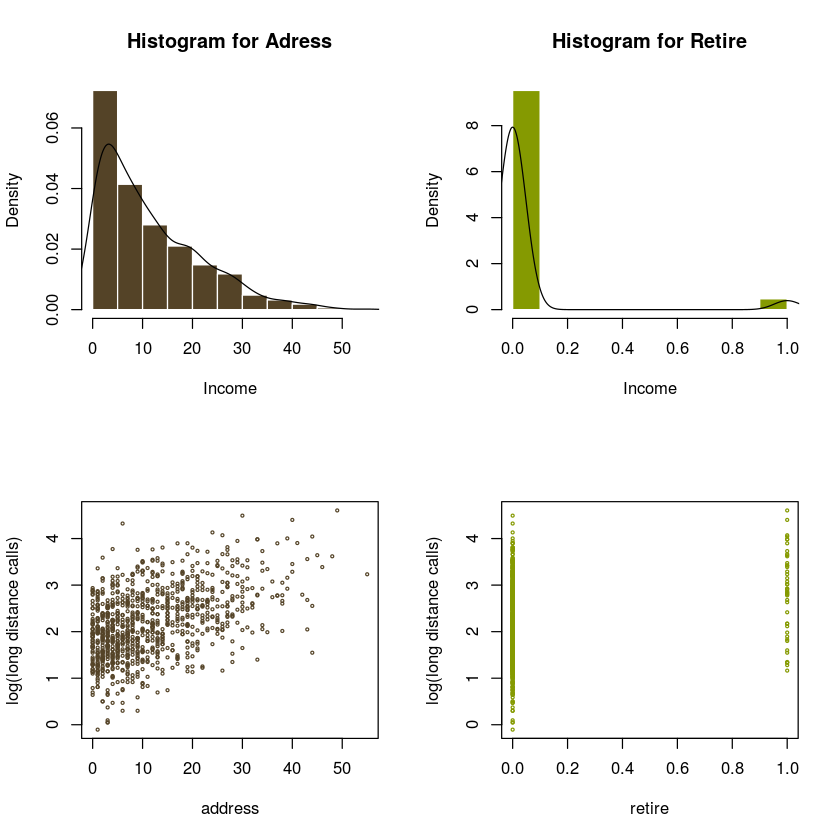

In [29]:
par(mfrow=c(2,2))

hist(df$address, 
     main="Histogram for Adress", 
     xlab="Income", 
     border=F, 
     col="#544327", 
     #xlim=c(0,600), 
     #las=3, 
     #breaks=32, 
     prob = TRUE)
lines(density(df$address))

hist(df$retire, 
     main="Histogram for Retire", 
     xlab="Income", 
     border=F, 
     col="#859a01", 
     #xlim=c(0,600), 
     #las=3, 
     #breaks=32, 
     prob = TRUE)
lines(density(df$retire))

plot(x=(df$address), y = log(df$longmon) , col = "#544327", cex=.4, xlab="address", ylab="log(long distance calls)")
plot(x=df$retire, y = log(df$longmon) , col = "#859a01", cex=.4, xlab="retire", ylab="log(long distance calls)")


In [30]:
fit <- lm(log(longmon) ~ tenure+age+marital+address+income+employ+retire+gender+wiremon+churn+H+S+C+P, data=df)
summary(fit)


Call:
lm(formula = log(longmon) ~ tenure + age + marital + address + 
    income + employ + retire + gender + wiremon + churn + H + 
    S + C + P, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.25670 -0.24568  0.00158  0.25576  1.23026 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.147e+00  6.601e-02  17.382  < 2e-16 ***
tenure       2.727e-02  7.851e-04  34.736  < 2e-16 ***
age         -2.531e-03  1.660e-03  -1.525  0.12767    
marital      6.961e-02  2.558e-02   2.721  0.00662 ** 
address      3.787e-03  1.736e-03   2.181  0.02940 *  
income      -8.483e-05  1.482e-04  -0.573  0.56711    
employ       3.570e-03  2.012e-03   1.774  0.07636 .  
retire       1.984e-01  6.861e-02   2.891  0.00392 ** 
gender      -3.469e-02  2.510e-02  -1.382  0.16731    
wiremon     -7.715e-05  6.797e-04  -0.114  0.90965    
churn       -3.877e-02  3.086e-02  -1.256  0.20930    
H            9.881e-02  3.687e-02   2.680  0.00749 ** 
S     

1)Education is a complex set of values and we can delete it only if all education values are insignificant. But in our case we can see, that three of them are statistically significant, so we have to leave it in our model. 
It means that when all other regressors are constant we have that when client id not complete high school then the logarith of long distance calls will not change. But when client has finished for example higher school, then the logarithm of longmon parameter will be increased on 9.881e-02 and if he(or she) has college degree the logarithm of his(or her) longmon parameter will be increased on 1.327e-01.

Did not complete high school; High school degree; Some college; College degree; Post-undergraduate degree

2)Address in linear regression has p-value very close to 0, this it statisticaly signifficant regressor (* we can be > 90% sure about that).  The meaning of address in our model is that each aditional year each the client lives at the current state changes the logarithm of his long distance call value on 3.787e-03 per month. Adress is also skewed but we can not normilize it using log because it includes zero values.

3)The variable tenure is very sparse and contains only a few retired but it is stilll signifficant(p-value=0.0011). The economical interpretation is that when all other regressors are constant we have that when client isn't retired, then long distance calls will not change. But when client is retired, then the logarithm of longmon parameter will be increased on 2.727e-02.


##### 5. Compute the 95% confidence intervals for the parameters of address and income and provide its economic meaning. Relate the CIs to the tests of significance, i.e. how would you use these intervals to decide about the significance of the corresponding explanatory variables? The CIs are computed relying on the assumption, that the residuals follow normal distribution. Is this assumption fulfilled? Run an appropriate goodness-of-fit test.

I will use the R function $confint(linear \ regression \ model)$ to compute those confidence intervals. The unknown parameter $B_j$ belongs with the probability of 95% to the interval:

$[\beta_j-t_{N-K-1;0,975}\sqrt{\hat{Var(\hat\beta_{j})}} ; \beta_j+t_{N-K-1;0,975}\sqrt{\hat{Var(\hat\beta_{j})}} ]$


In [31]:
confint(fit)

,2.5 %,97.5 %
(Intercept),1.0178005295,1.2768568584
tenure,0.0257309336,0.0288122961
age,-0.0057883685,0.0007266234
marital,0.0194091202,0.1198168407
address,0.0003800175,0.0071949370
income,-0.0003756035,0.0002059425
employ,-0.0003789200,0.0075183470
retire,0.0637278728,0.3330222506
gender,-0.0839407116,0.0145690830
wiremon,-0.0014109948,0.0012566884


Thus the unknown parametr of address with the probability 95% belongs to the interval [0.0003800175	0.0071949370] and has positive impact onto the longmon value. But the income is not statistically significant and we even don't know which sighn (thus wich impact) it has onto the longmon variable as it belongs to the interval [-0.0003756035	0.0002059425 ] and $\beta_ {income}=0$ is a possible value

And the test on significanse of those variable parameters confirmed my assumptions.

Test for general linear hypothesis about the significance of address variable:

$H_0: \beta_{address} = 0 \ \ \ \ $   $\ \ \ H_1: \beta_{address}<> 0 $

In [32]:
print("Test on significans address : ")
R=c(0,0,0,1,0,0,0,0,0,0,0,0,0,0, 0)
r=c(0)
glh.test( fit, cm=R, d=r )

[1] "Test on significans address : "



	 Test of General Linear Hypothesis 	
Call:
glh.test(reg = fit, cm = R, d = r)
F = 7.4041, df1 =   1, df2 = 985, p-value = 0.006622 


$0.01 > p_{value}$, this rejects $H_0$

Test for general linear hypothesis about the significance of address variable:

$H_0: \beta_{income} = 0 \ \ \ \ $   $\ \ \ H_1: \beta_{income}<> 0 $

In [33]:
print("Test on significans address : ")
R=c(0,0,0,0,1,0,0,0,0,0,0,0,0,0,0)
r=c(0)
glh.test( fit, cm=R, d=r )

[1] "Test on significans address : "



	 Test of General Linear Hypothesis 	
Call:
glh.test(reg = fit, cm = R, d = r)
F = 4.7578, df1 =   1, df2 = 985, p-value = 0.0294 


$0.01 < p_{value} < 0.05$, it depends on the $\alpha$ wether to reject $H_0$ or confirm $H_1$


The CIs are computed relying on the assumption, that the residuals follow normal distribution. If the residuals are not normal, then the finite sampledistribution of $\hatβ̂$ is unknown, thus asymptotic properties

The normality of the residuals can be verified using goodness-of-fit tests. For example the Kolmogorov-Smirnov test is used to decide if a sample comes from a population with a specific distribution. 

$H_0 :$ residuals are from normal distribution        $\ \ \ \  \ H_1 :$ residuals are not from normal distribution

In [34]:
resid <- fit$residuals
ks.test(resid, "pnorm", mean=mean(resid), sd = sqrt(var(resid)))


	One-sample Kolmogorov-Smirnov test

data:  resid
D = 0.019609, p-value = 0.8366
alternative hypothesis: two-sided


$p_{value} >> 0.05 => H_0$ not rejected with $95\%$ confidence, thus the $\text{assumption is fulfilled}$

##### 6. Many of the variable appear insignificant and we should find the smallest model, which still has a good explanatory power. Choose this model using stepwise model selection (either based on the tests for R 2 or using AIC/BIC). Pick up the last step of the model selection procedure and explain in details how the method/approach works (or is implemented in your software). Work with this model in all the remaining steps.

To choose the smallest model without insignificant regressors with still good explanatory power I will use Akaike's An Information Criterion (AIC) method in this analysis, which uses the same formula as in our presentation.

In [35]:
fit <- lm(log(longmon) ~ tenure+age+marital+address+income+employ+retire+gender+wiremon+churn+H+S+C+P, data=df)
AIC(fit) # 988.858
fit.transformed <- lm(log(longmon) ~ .-wiremon, data = df)
AIC(fit.transformed) # 986.8712
fit.transformed <- lm(log(longmon) ~ . - wiremon -income, data = df)
AIC(fit.transformed) # 985.2100
fit.transformed <- lm(log(longmon) ~ . - wiremon -income -churn, data = df)
AIC(fit.transformed) # 984.870
fit.transformed <- lm(log(longmon) ~ . - wiremon -income -churn -gender, data = df)
AIC(fit.transformed) # 984.923 > 984.870!!!!!
fit.transformed <- lm(log(longmon) ~ . - wiremon -income -churn, data = df)

[1] 988.8581

[1] 986.8712

[1] 985.21

[1] 984.8703

[1] 984.9231

In [36]:
summary(fit.transformed)


Call:
lm(formula = log(longmon) ~ . - wiremon - income - churn, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.27687 -0.24695  0.00089  0.25022  1.22148 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.1322714  0.0636085  17.801  < 2e-16 ***
tenure       0.0275334  0.0007524  36.593  < 2e-16 ***
age         -0.0025479  0.0016550  -1.540  0.12399    
marital      0.0702773  0.0254989   2.756  0.00596 ** 
address      0.0038013  0.0017339   2.192  0.02859 *  
employ       0.0031048  0.0017773   1.747  0.08096 .  
retire       0.2100116  0.0656765   3.198  0.00143 ** 
gender      -0.0357228  0.0250707  -1.425  0.15451    
H            0.0945866  0.0363397   2.603  0.00938 ** 
S            0.0842320  0.0392932   2.144  0.03230 *  
C            0.1195181  0.0386262   3.094  0.00203 ** 
P            0.0146405  0.0565160   0.259  0.79565    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard erro

As result of our AIC tests we removed wiremon, post-undergraduate degree , income and churn parameters from our model, minimizing  our AIC critea.
To understand how AIC criteria works we can describe the last step, that we did:

1) Calculate AIC criteria after previous step(removing income regressor)

2) Check p-values of significance our regressors in the model

3) Select the least significant regressor (with the biggest p-value) and try to remove it from our model. Our least significant column is churn.

4) Calculate AIC criteria again to check did the value change. Our AIC is less, than previous so we delete our churn column from model and it was a good choice.

5) We try to find more insignificant columns, so we try to do the same with gender regressor, but receive AIC bigger, than previous, so we stop our removing regressors process.

Also I don't delete our education as it's complex set of values and we can delete it only if all education values are insignificant. But it is not so.

##### 7. Sometimes data contains outliers which induces bias in the parameter estimates. Check for outliers using Cook’s distance and leverage. Have a closer look at the observation with the highest leverage (regardless if it is classified as an outlier or not). What makes this observation so outstanding (you may have a look at Box-plots for interval scaled variables or at the frequencies for binary/ordinal variables?

1)Cook's Distance

The OLS estimators are a weighted average of the elements of y , thus some observations may have larger impact than other. To identify influential observations we can use Cook’s Distance:

$D_i = \frac{(\hat\beta - \hat\beta_i)'X'X(\hat\beta - \hat\beta_i)}{(K+1)\hat\sigma^2}$

where $b_i$ is the vector of estimated parameters with dropped i-th observation. Cook’s D is calculated by removing the data point from the model and recalculating the regression. It summarizes how much all the values in the regression model change when the ith observation is removed. 

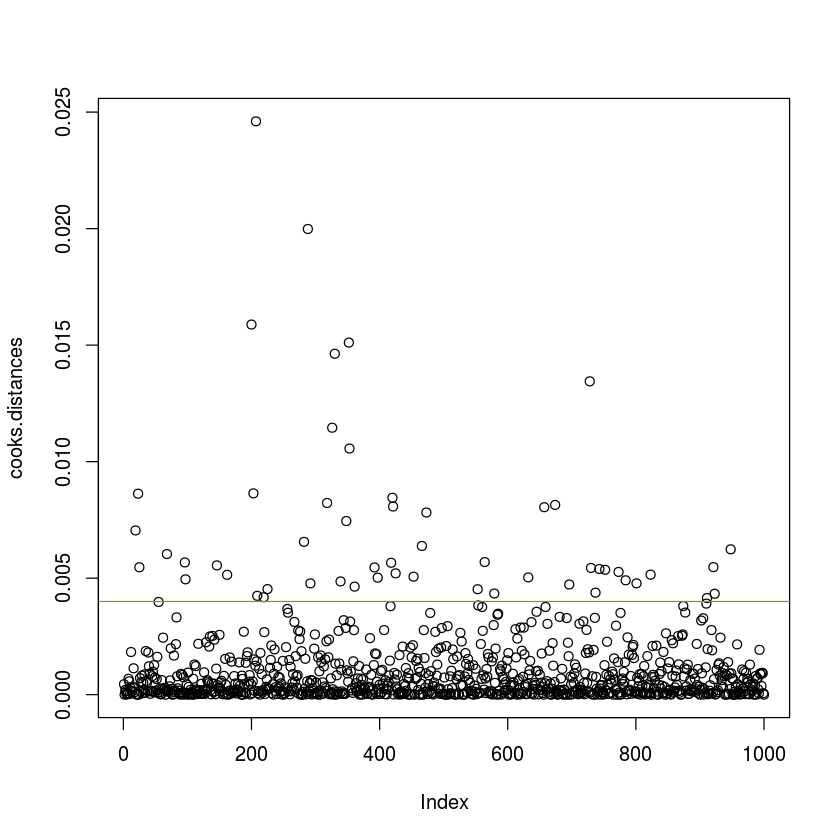

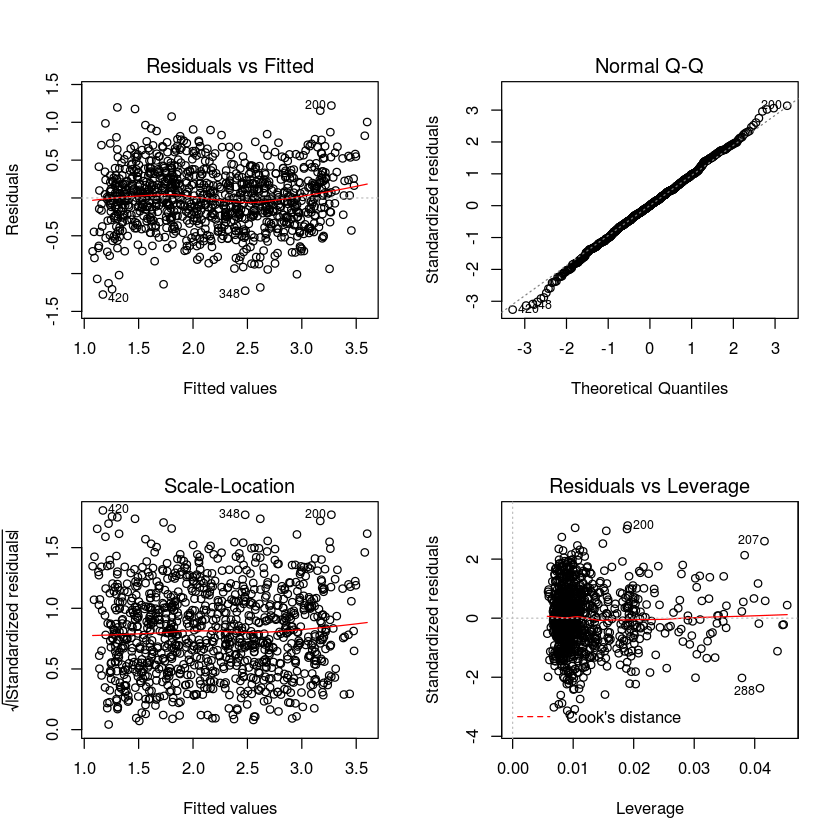

In [37]:
cooks.distances <- cooks.distance(fit.transformed) 
plot(cooks.distances)
abline(h = 0.004, col='#859a01')
text(-1.5, 0.1, "threshold", col = "#859a01") 
par(mfrow=c(2,2))
plot(fit.transformed)

To find outliers one should compare datapoints' Cook's distance and threshold. Values greater than 4/size  are considered high influence. 
From the first picture I can see, that in our dataset there are some outliers according to Cook's distance.

The list of indexes of all values, which are considered as outliers by Cook's distance:

In [38]:
sorted.cooks.distances <- rev(sort(cooks.distances))
names(sorted.cooks.distances[sorted.cooks.distances > 0.004])

[1] "207" "288" "200" "352" "330" "728" "326" "353" "203" "23"  "420" "318"
[13] "674" "421" "657" "473" "348" "19"  "282" "466" "948" "68"  "564" "96" 
[25] "418" "146" "921" "25"  "392" "730" "743" "752" "773" "425" "823" "162"
[37] "453" "632" "397" "97"  "784" "339" "801" "292" "696" "361" "225" "553"
[49] "737" "579" "923" "209" "219" "911"

2) Leverages

An important tool in determining the influential points is leverage $h_i$, which measures how far is the given observation from the rest of the values. The leverage is also the diagonal element of the projection matrix.

High-leverage points are observations made at extreme or outlying values of the independent variables such that the lack of neighboring observations means that the fitted regression model will pass close to that particular observation. Thus high-leverage points can affect the results of an analysis.

The top 10 maximum leverages:


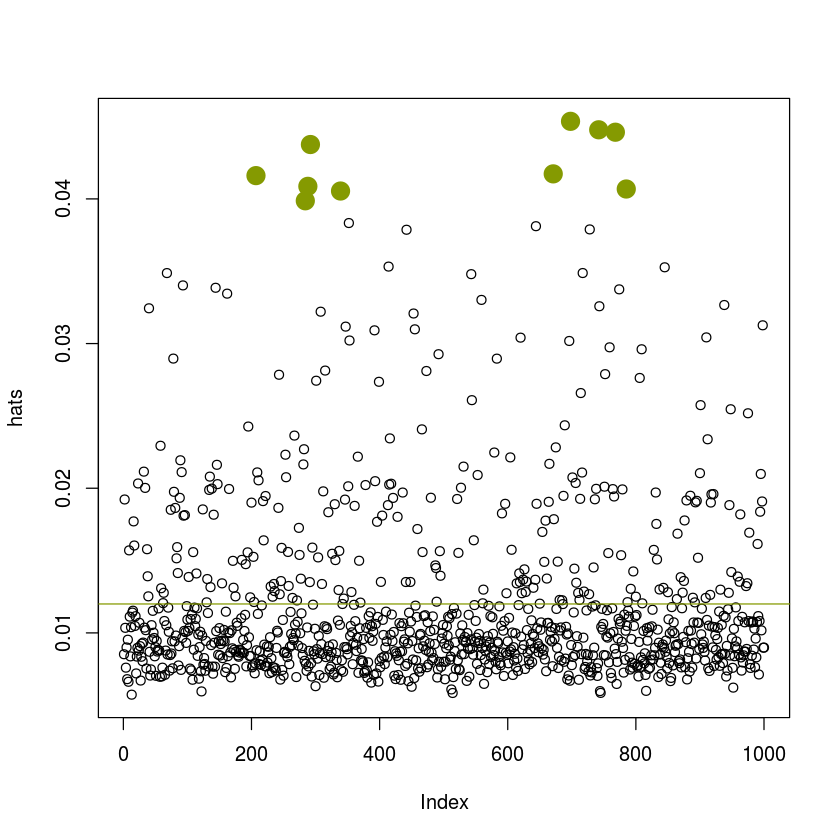

In [39]:
hats <- hatvalues(fit.transformed)

hv.dataframe <- as.data.frame(hats)
hv.mean <-mean(hats)
hv.dataframe$warn <- ifelse(hv.dataframe>3*hv.mean, 'x3',
   ifelse(hv.dataframe>2*hv.mean, 'x3', '-' ))

# names(hats)
top.10.hats <- names(rev(sort(hats))[0:10])
plot(hats, col=ifelse(names(hats) %in% top.10.hats, "#859a01", "black"), pch=ifelse(names(hats) %in% top.10.hats, 19, 1), cex=ifelse(names(hats) %in% top.10.hats, 2, 1))
abline(h=hv.mean,col='#859a01')


A rule-of-thumb is to carefully examine any points whose leverage is more than twice their average value.

High leverage on its own does not indicate that something is wrong with the normal linear model. Leverage only depends on the explanatory variable and the actual response value may still be consistent with the model and just examination of the residuals may not help at all.

##### 8. Frequently data is missing. Pick up 5 rows in the data set and delete the value for address. Implement at least two approaches to fill in these values. Write down the corresponding formulas/model and give motivation for your approach. If you use standard routines then check how exactly the data imputation is implemented. How would you proceed if the value of the binary variable retire is missing? Implementation is not required.


There are three types of missed data and those different approaches of dealing with them.

$Missing \ completely \ at \ random \ (MCAR)$ - the data is missing independently of the observed and missing values

$Missing \ at \ random \ (MAR)$ - the data is missing independently of the missing values

$ Missing \ not \ at \ random \ (MNAR)$ - if the data is missing strongly depends on the values


Solutions for $MCAR$ and $MAR$:
    - Drop the rows with missing data
    - hot imputation: the missing value is replaced with some random but typical
    - mean imputation: the missing value is replaced with the mean of the observed values
    - regression imputation: the missing value is forecasted using some model (regression)

For $MNAR$ we have informative missingness. A more complex modelling is required.

If we randomply pick up 5 rows and delete the value for address, then we deal with $MCAR$

$List \ of \ the \  most \ popular \ R \ Packages \ for \ imputing \ missing \ data:$

1.MICE - Creating multiple imputations as compared to a single imputation (such as mean) takes care of uncertainty in missing values.

2.Amelia - performs multiple imputation (generate imputed data sets) to deal with missing values

3.missForest - is an implementation of random forest algorithm. It’s a non parametric imputation method applicable to various variable types.

4.Hmisc - as default uses predictive mean matching (default) to impute missing values

5.mi - builds multiple imputation models to approximate missing values and uses predictive mean matching method.


In [43]:
#install.packages("mice")
#library("mice")
#X = log(df);
#colnames(X) = c("log.address")
#X.missing = rbinom(dim(X)[1]*dim(X)[2],1, 0.20)
#dim(X.missing)=dim(X); X.missed = X;
#X.missed[which(X.missing==1)] = NA; X.missed= as.data.frame(X.missed);
#marginplot(X.missed[c(1,2)])"""

##### 9. Now we look at the model assumptions. The variable address seems to be very significant. However, if we look at the residuals we observe that the variance of the residuals is rather different for different values of address. Run the Bartlett’s test and compute the FGLS estimators assuming an exponential relationship between the variance of residuals and address. Compare the results with the original model. Explain the advantages of the (F)GLS estimation.

Bartlett test of homogeneity of variance:

In [45]:
summary<-summary(fit.transformed)
residuals.variance <- summary$sigma
library(dplyr)
bartlett.df <- df
bartlett.df$residuals <- fit.transformed$residuals
add_count <- bartlett.df %>% group_by(address) %>% count() %>% filter(n>1)
btdat <- bartlett.df %>% filter(address %in% add_count$address)
bartlett.test(btdat$residuals, btdat$address)


	Bartlett test of homogeneity of variances

data:  btdat$residuals and btdat$address
Bartlett's K-squared = 39.282, df = 42, p-value = 0.5909


p-value = 0.5909. 


In [47]:
library(nlme)
gls(log(longmon)~tenure + age + marital + address + employ + retire + gender+H+S+C+P, data=df)


Generalized least squares fit by REML
  Model: log(longmon) ~ tenure + age + marital + address + employ + retire +      gender + H + S + C + P 
  Data: df 
  Log-restricted-likelihood: -523.0866

Coefficients:
 (Intercept)       tenure          age      marital      address       employ 
 1.132271407  0.027533445 -0.002547949  0.070277327  0.003801266  0.003104769 
      retire       gender            H            S            C            P 
 0.210011582 -0.035722756  0.094586622  0.084232001  0.119518137  0.014640466 

Degrees of freedom: 1000 total; 988 residual
Residual standard error: 0.3931881 

With GLS regressors significance a little bit changed, as this model was fit with taking into account variance of account regressor and FGLS estimators assumed an exponential relationship between the variance of residuals and address. Also residual standard error became smaller just a little.

##### 10. Compute the White estimator of covariance matrix of the OLS estimators. Run the t-tests and compare the results with the original model. Explain the advantages of the White estimator for the variance.'

White's estimator:

In [49]:
library(sandwich)
library(lmtest)
covWhite <- vcovHAC(fit.transformed, type='HC')
covWhite

coeftest(fit.transformed, vcov=covWhite)

,(Intercept),tenure,age,marital,address,employ,retire,gender,H,S,C,P
(Intercept),4.103819e-03,-6.737935e-06,-7.981318e-05,-4.109372e-04,2.990507e-05,3.483732e-05,8.875916e-04,-2.907429e-04,-9.297616e-04,-9.677893e-04,-1.044288e-03,-8.118163e-04
tenure,-6.737935e-06,5.679166e-07,-7.751083e-09,-3.660902e-06,-5.553357e-07,-3.193338e-07,-2.195447e-06,-1.589197e-06,-1.659957e-06,1.805407e-06,-9.108554e-07,-7.964680e-07
age,-7.981318e-05,-7.751083e-09,2.854265e-06,1.275070e-06,-1.559859e-06,-1.720682e-06,-3.767294e-05,2.421456e-06,-3.502000e-07,-4.368662e-06,-3.779706e-06,-1.018544e-05
marital,-4.109372e-04,-3.660902e-06,1.275070e-06,6.815970e-04,6.940935e-06,-1.627278e-06,2.734846e-04,-3.874351e-06,5.845785e-05,1.181752e-04,1.159083e-04,-5.203123e-05
address,2.990507e-05,-5.553357e-07,-1.559859e-06,6.940935e-06,3.262758e-06,5.403113e-07,1.392915e-05,1.325565e-06,5.608659e-06,1.028655e-05,9.119199e-06,1.416766e-05
employ,3.483732e-05,-3.193338e-07,-1.720682e-06,-1.627278e-06,5.403113e-07,3.323966e-06,9.350935e-06,-1.152421e-06,4.578078e-06,5.448078e-06,1.269185e-05,1.645109e-05
retire,8.875916e-04,-2.195447e-06,-3.767294e-05,2.734846e-04,1.392915e-05,9.350935e-06,4.168785e-03,-9.308269e-05,1.669271e-04,3.490878e-04,2.884005e-04,2.158279e-04
gender,-2.907429e-04,-1.589197e-06,2.421456e-06,-3.874351e-06,1.325565e-06,-1.152421e-06,-9.308269e-05,6.157225e-04,-3.862237e-05,-1.250449e-04,-3.410650e-05,2.157042e-05
H,-9.297616e-04,-1.659957e-06,-3.502000e-07,5.845785e-05,5.608659e-06,4.578078e-06,1.669271e-04,-3.862237e-05,1.405962e-03,8.370846e-04,9.112210e-04,8.830135e-04
S,-9.677893e-04,1.805407e-06,-4.368662e-06,1.181752e-04,1.028655e-05,5.448078e-06,3.490878e-04,-1.250449e-04,8.370846e-04,1.673661e-03,9.560383e-04,9.623009e-04



t test of coefficients:

              Estimate Std. Error t value  Pr(>|t|)    
(Intercept)  1.1322714  0.0640610 17.6749 < 2.2e-16 ***
tenure       0.0275335  0.0007536 36.5358 < 2.2e-16 ***
age         -0.0025480  0.0016895 -1.5081  0.131837    
marital      0.0702773  0.0261074  2.6919  0.007226 ** 
address      0.0038013  0.0018063  2.1044  0.035593 *  
employ       0.0031048  0.0018232  1.7029  0.088893 .  
retire       0.2100116  0.0645661  3.2527  0.001182 ** 
gender      -0.0357228  0.0248138 -1.4396  0.150287    
H            0.0945866  0.0374962  2.5226  0.011806 *  
S            0.0842320  0.0409104  2.0589  0.039762 *  
C            0.1195181  0.0395117  3.0249  0.002552 ** 
P            0.0146405  0.0581539  0.2518  0.801284    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


As we can see our model is almost the same as previous one. The significance of regressors didn't change. 

While the OLS point estimator remains unbiased, it has minimum mean square error, and the OLS variance estimator does not provide a consistent estimate of the variance of the OLS estimates.

For any non-linear model, however, heteroscedasticity has more severe consequences: the maximum likelihood estimates of the parameters will be inconsistent and biased (in an unknown direction).
